# [IAPR 2020:][iapr2020] Lab 2 ‒  Object description

**Authors:** first_name_1 last_name_1, first_name_2 last_name_2, first_name_3 last_name_3  
**Due date:** 24.04.2020

[iapr2020]: https://github.com/LTS5/iapr-2020

## Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [198]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1
In the `lab-02-data/part1` folder, you will find 28x28 grey-scale pictures of handwritten "0" and "1".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

Your goal is to extract, from each of those images, a 2-dimensional feature vector (i.e. 2 features) and to plot them all on a 2D graph.
If you have chosen good features, the vectors of the "0"'s should nicely cluster in one part of the plane and those of the "1"'s in another.

Please try first the Fourier Descriptors.
You can make several attempts: e.g. with and without invariance to rotation, translation, scaling, etc.
You can also for instance rotate the images and assess the invariance in rotation.

**Note:** for the Fourier descriptors, the u_k signal has to be constructed by following the contour point after point.
Some pre-processing (image binarization, possibly some Mathematical Morphology) might be useful.

Then feel free to try other features, the more you try, the better it will be (for you).

### 1.1 Data visualization

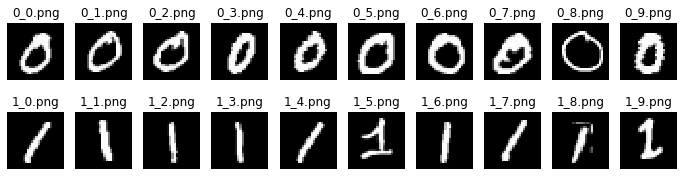

In [254]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load images
data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
#  Load zeros
zeros_path = os.path.join(data_base_path, data_folder, 'part1', '0')
zeros_names = [nm for nm in os.listdir(zeros_path) if '.png' in nm]  # make sure to only load .png
zeros_names.sort()  # sort file names
ic = skimage.io.imread_collection([os.path.join(zeros_path, nm) for nm in zeros_names])
zeros_im = skimage.io.concatenate_images(ic)
#  Load ones
ones_path = os.path.join(data_base_path, data_folder, 'part1', '1')
ones_names = [nm for nm in os.listdir(ones_path) if '.png' in nm]  # make sure to only load .png
ones_names.sort()  # sort file names
ic = skimage.io.imread_collection(([os.path.join(ones_path, nm) for nm in ones_names]))
ones_im = skimage.io.concatenate_images(ic)

# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 1.2 Fourier descriptors


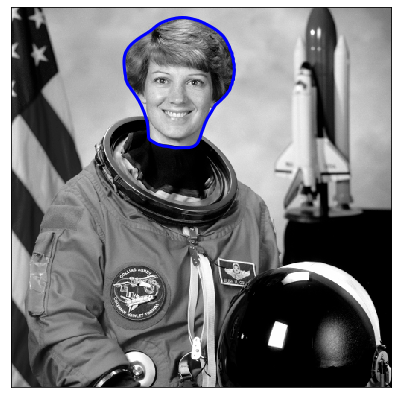

In [255]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour


img = data.astronaut()
img = rgb2gray(img)


snake = active_contour(gaussian(img, 3),
                       init, alpha=0.015, beta=10, gamma=0.001,
                       coordinates='rc')

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

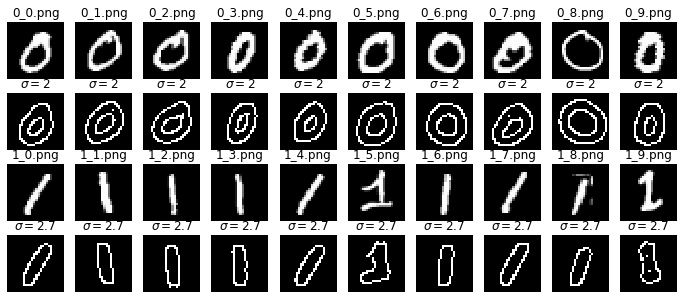

In [256]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import cv2
from skimage import feature

zeros_im_filtres_contours=[]#contours of zeros images
ones_im_filtres_contours=[]#contours of ones images
# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(12, 5))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im in zip(axes[1], zeros_im):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2)
    zeros_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2$')
for ax, im, nm in zip(axes[2], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], ones_im, ones_names):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2.7)
    ones_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2.7$')

plt.show()

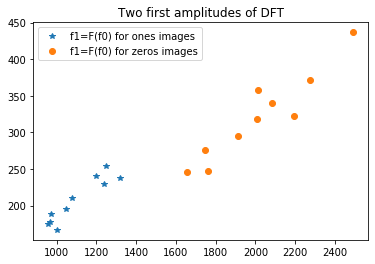

The first two amplitude of DFT of the 0 zero image are [1913.89995  295.5766 ]
The first two amplitude of DFT of the 0 one image are [1913.89995  295.5766 ]
The first two amplitude of DFT of the 1 zero image are [2006.10693  317.78933]
The first two amplitude of DFT of the 1 one image are [2006.10693  317.78933]
The first two amplitude of DFT of the 2 zero image are [2084.78296  339.89913]
The first two amplitude of DFT of the 2 one image are [2084.78296  339.89913]
The first two amplitude of DFT of the 3 zero image are [1760.71633  247.81443]
The first two amplitude of DFT of the 3 one image are [1760.71633  247.81443]
The first two amplitude of DFT of the 4 zero image are [1658.16676  246.39016]
The first two amplitude of DFT of the 4 one image are [1658.16676  246.39016]
The first two amplitude of DFT of the 5 zero image are [2014.79031  357.99897]
The first two amplitude of DFT of the 5 one image are [2014.79031  357.99897]
The first two amplitude of DFT of the 6 zero image are [22

In [257]:
## Fourier transform
from scipy.linalg import dft

u_ones=[] ## vector contain all the coordinate of contours in each ones images
u_ones_dft=[] ## vector dft (just two first) contain all the coordinate of contours in each ones images
u_zeros=[] ## vector contain all the coordinate of contours in each zeros images
u_zeros_dft=[] ## vector dft (just two first features) contain all the coordinate of contours in each zeros images
for contour in zeros_im_filtres_contours:
    u_ones+=[contour[k,0]+contour[k,1]*1j for k in range(len(contour))]
    x=np.array([contour[0,k]+contour[1,k]*1j for k in range(len(contour[0]))])
    m = dft(len(x))
    list_fourier_zeros=m.dot(x)
    u_zeros_dft+=[list_fourier_zeros[0:2]]
for contour in ones_im_filtres_contours:
    u_zeros+=[[contour[0,k]+contour[1,k]*1j for k in range(len(contour[0]))]]
    x=np.array([contour[0,k]+contour[1,k]*1j for k in range(len(contour[0]))])
    m = dft(len(x))
    list_fourier_ones=m.dot(x)
    u_ones_dft+=[list_fourier_ones[0:2]]
amplitude_ones=np.abs(np.array(u_ones_dft))
amplitude_zeros=np.abs(np.array(u_zeros_dft))
plt.plot(amplitude_ones[:,0],amplitude_ones[:,1],'*', label='f1=F(f0) for ones images')
plt.plot(amplitude_zeros[:,0],amplitude_zeros[:,1],'o', label='f1=F(f0) for zeros images')
plt.legend()
plt.title("Two first amplitudes of DFT")
plt.show()
for k in range(10):
    print("The first two amplitude of DFT of the",k,"zero image are",amplitude_zeros[k])
    print("The first two amplitude of DFT of the",k,"one image are",amplitude_zeros[k])



In [243]:
## Resizing images
scale_zeros=[] ## token from features of Fourier descriptors 
cpt=0 ## counter
for img in zeros_im:
    width_zeros = int(img.shape[1] * scale_zeros[cpt])
    height_zeros = int(img.shape[0] * scale_zeros[cpt])
    dim_zeors = (width_zeros, height_zeros)
    # resize image
    resized_zeros[cpt] = cv2.resize(img, dim_zeros, interpolation = cv2.INTER_AREA)
    cpt+=1
cpt=0
scale_ones=[]
for img in ones_im:
    width_ones = int(img.shape[1] * scale_ones[cpt])
    height_ones = int(img.shape[0] * scale_ones[cpt])
    dim_ones = (width_ones, height_ones)
    # resize image
    resized_zeros[cpt] = cv2.resize(img, dim_zeros, interpolation = cv2.INTER_AREA)
    cpt+=1

IndexError: list index out of range

### 1.3 Additional method(s)
Add your implementation and discussion

## Part 2
The `lab-02-data/part2` folder contains grey-scale pictures of handwritten "2" and "3".
Extract the same feature (typically 2 Fourier descriptors) as in part 1 also on these images and plot them on the same graph as the features of the "0" and "1".
Is it possible to discriminate all these 4 digits with a 2-dimensional feature vector?

### 2.1 Data visualization

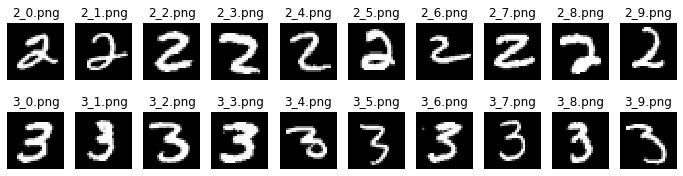

In [249]:
#  Load zeros
twos_path = os.path.join(data_base_path, data_folder, 'part2', '2')
twos_names = [nm for nm in os.listdir(twos_path) if '.png' in nm]  # make sure to only load .png
twos_names.sort()  # sort file names
ic = skimage.io.imread_collection([os.path.join(twos_path, nm) for nm in twos_names])
twos_im = skimage.io.concatenate_images(ic)
#  Load ones
threes_path = os.path.join(data_base_path, data_folder, 'part2', '3')
threes_names = [nm for nm in os.listdir(threes_path) if '.png' in nm]  # make sure to only load .png
threes_names.sort()  # sort file names
ic = skimage.io.imread_collection(([os.path.join(threes_path, nm) for nm in threes_names]))
threes_im = skimage.io.concatenate_images(ic)

# Plot images
fig, axes = plt.subplots(2, len(twos_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 2.2 Additional method(s) and conclusion
Add your implementations and discussions here

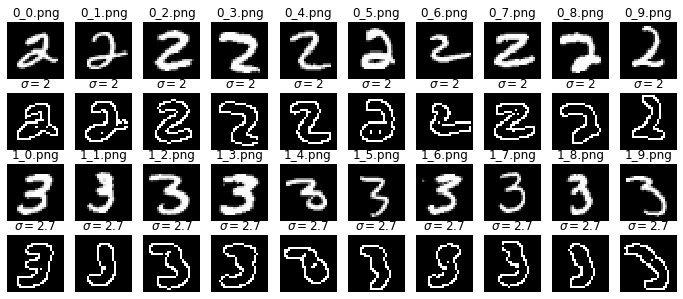

In [259]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
import cv2
from skimage import feature
zeros_im=twos_im
ones_im=threes_im
zeros_im_filtres_contours=[]#contours of zeros images
ones_im_filtres_contours=[]#contours of ones images
# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(12, 5))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im in zip(axes[1], zeros_im):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2)
    zeros_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2$')
for ax, im, nm in zip(axes[2], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], ones_im, ones_names):
    # Compute the Canny filter for two values of sigma
    edges = feature.canny(im,sigma=2.4)
    ones_im_filtres_contours+=[np.array(np.where(edges==1)).astype(int)]
    ax.imshow(edges, cmap=plt.cm.gray)
    ax.axis('off')
    ax.set_title(r'$\sigma=2.7$')

plt.show()

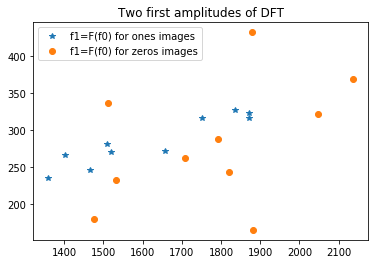

In [251]:
## Fourier transform
from scipy.linalg import dft

u_ones=[] ## vector contain all the coordinate of contours in each ones images
u_ones_dft=[] ## vector dft (just two first) contain all the coordinate of contours in each ones images
u_zeros=[] ## vector contain all the coordinate of contours in each zeros images
u_zeros_dft=[] ## vector dft (just two first features) contain all the coordinate of contours in each zeros images
for contour in zeros_im_filtres_contours:
    u_ones+=[contour[k,0]+contour[k,1]*1j for k in range(len(contour))]
    x=np.array([contour[0,k]+contour[1,k]*1j for k in range(len(contour[0]))])
    m = dft(len(x))
    list_fourier_zeros=m.dot(x)
    u_zeros_dft+=[list_fourier_zeros[0:3]]
for contour in ones_im_filtres_contours:
    u_zeros+=[[contour[0,k]+contour[1,k]*1j for k in range(len(contour[0]))]]
    x=np.array([contour[0,k]+contour[1,k]*1j for k in range(len(contour[0]))])
    m = dft(len(x))
    list_fourier_ones=m.dot(x)
    u_ones_dft+=[list_fourier_ones[0:3]]
amplitude_ones=np.abs(np.array(u_ones_dft))
amplitude_zeros=np.abs(np.array(u_zeros_dft))
plt.plot(amplitude_ones[:,0],amplitude_ones[:,1],'*', label='f1=F(f0) for ones images')
plt.plot(amplitude_zeros[:,0],amplitude_zeros[:,1],'o', label='f1=F(f0) for zeros images')
plt.legend()
plt.title("Two first amplitudes of DFT")
plt.show()

In [258]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2).fit_transform(X)